In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import string

from getConfig import getConfig
from getData   import getData
from preProcess import preProcess
from getModels import getModels

maxRGB = 255
chars = list(string.ascii_lowercase)

In [2]:
config = getConfig()
train, test = getData(config)
dataDict = preProcess(train, test, config)

In [3]:
models = getModels("NN", config)

In [4]:
for model in models:
    ''' Load the model and run Test through it '''
    m = tf.keras.models.load_model(filepath=model, compile=False)
    predictions = m.predict(np.array(dataDict["testX"]))
    predictions = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(dataDict["testY"],predictions)
    print("Accuracy against test set: {:.1%}".format(accuracy))

Accuracy against test set: 91.1%


##### Create an index into successful predictions and errors

In [5]:
mask = [predictions != dataDict["testY"]]
# The sort will cause errors (1) to sort after successes (0)
errs = np.argsort(mask[0])

In [27]:
for n in range(26):
    # Get an index into this character
    tmp = dataDict["testY"] == n
    # Count how many errors for this character
    count = mask[0][tmp].sum()
    # Divide by the number of this character for the error rate
    rate = count / tmp.sum()
    label = chars[n]
    print("{:<5}{:.1%}".format(label, rate))

a    7.6%
b    4.8%
c    9.9%
d    7.6%
e    3.9%
f    6.6%
g    23.8%
h    6.0%
i    31.4%
j    11.0%
k    6.4%
l    22.5%
m    2.4%
n    11.6%
o    3.5%
p    2.8%
q    18.5%
r    7.9%
s    2.8%
t    5.6%
u    7.2%
v    9.1%
w    2.9%
x    7.2%
y    7.0%
z    2.1%


In [7]:
def showImage(image, label, prediction):
    image = np.reshape(image, newshape=[28,28])
    plt.imshow(image, cmap='Greys')
    title = "Labeled as: "+ str(label)+" predicted as: " + str(prediction)
    plt.title(title)
    plt.show()

##### Show some successful predictions

In [8]:
# assuming errors comprise 5% of the file
errorRate = 0.05
errorIdx = int(errs.shape[0] * (1-errorRate))
successIdx = int(errs.shape[0] * 0.5)

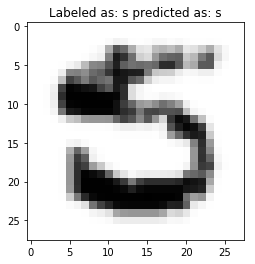

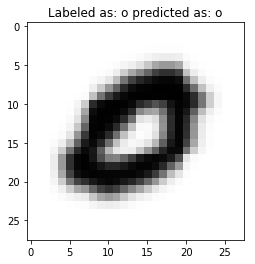

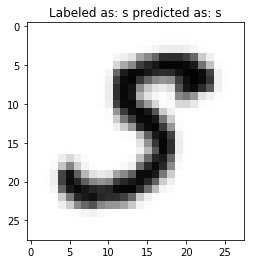

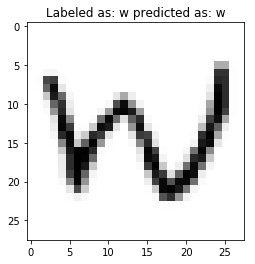

KeyboardInterrupt: 

In [9]:
while True:
    idx = np.random.randint(low=0, high=successIdx)
    x = dataDict["testY"][errs[idx]]
    label = chars[x]
    x = predictions[errs[idx]]
    prediction = chars[x]
    showImage(dataDict["testX"][errs[idx]],\
              label,\
              prediction)
    input()

##### Show some errors

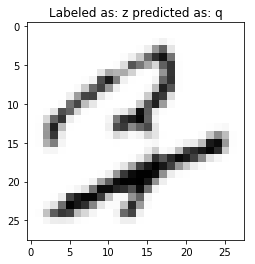

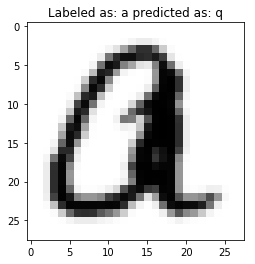

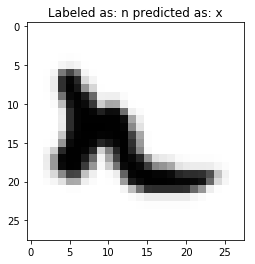

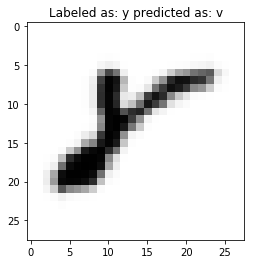

KeyboardInterrupt: 

In [10]:
for index in range(19000,19500):
    x = dataDict["testY"][errs[index]]
    label = chars[x]
    x = predictions[errs[index]]
    prediction = chars[x]
    showImage(dataDict["testX"][errs[index]],\
              label,\
              prediction)
    input()